<a href="https://colab.research.google.com/github/Recollectionss/numeral-methods/blob/main/lab_4/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Рівновіддалені точки. Таблиця розділених різниць:
  i        x       f(x)       Δ^1f(x)       Δ^2f(x)       Δ^3f(x)       Δ^4f(x)       Δ^5f(x)       Δ^6f(x)       Δ^7f(x)       Δ^8f(x)       Δ^9f(x)       Δ^10f(x)       Δ^11f(x)       Δ^12f(x)       Δ^13f(x)       Δ^14f(x)       
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0     0.0000     0.0000     0.9835       -0.2083       -0.2250        0.1433       -0.0115       -0.0306        0.0140       -0.0007       -0.0011        0.0005       -0.0002        0.0000        0.0000       -0.0000    
  1     0.2244     0.2207     0.8900       -0.3598       -0.0963        0.1304       -0.0527       -0.0086        0.0128       -0.0030        0.0001        0.0001       -0.0001        0.0001       -0.0000    
  2     0.4488     0.4204     0.7285       -0.4246        0.0207

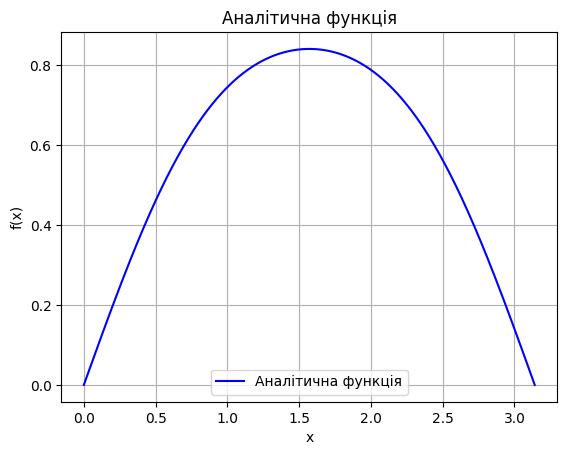

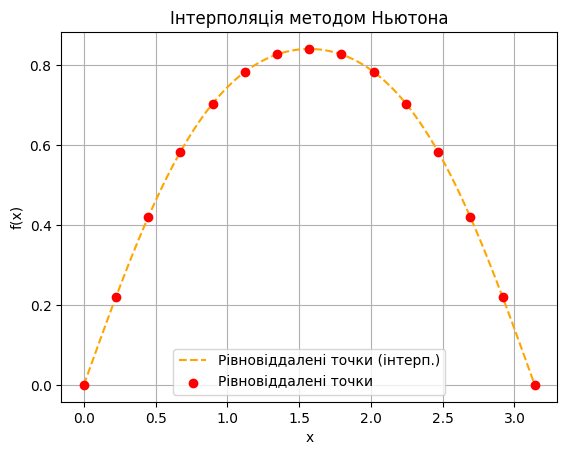

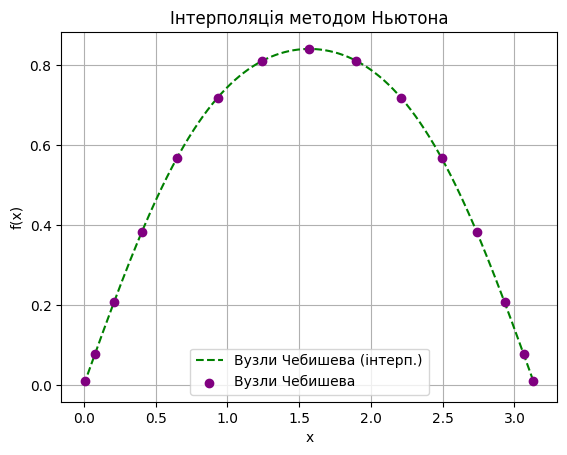

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Аналітична функція
def f(x):
    return np.sin(np.sin(x))

# Генерація вузлів Чебишева
def chebyshev_nodes(a, b, n):
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * np.arange(n) + 1) / (2 * n) * np.pi)

# Метод Ньютона: побудова інтерполяційного полінома
def newton_interpolation(x_vals, y_vals, x):
    n = len(x_vals)
    divided_diff = np.zeros((n, n))
    divided_diff[:, 0] = y_vals

    for j in range(1, n):
        for i in range(n - j):
            divided_diff[i, j] = (divided_diff[i + 1, j - 1] - divided_diff[i, j - 1]) / (x_vals[i + j] - x_vals[i])

    # Побудова полінома Ньютона
    polynomial = divided_diff[0, 0]
    for i in range(1, n):
        term = divided_diff[0, i]
        for j in range(i):
            term *= (x - x_vals[j])
        polynomial += term
    return polynomial, divided_diff

# Зворотна інтерполяція
def inverse_interpolation(x_vals, y_vals, y_target):
    def closest_pair(y_vals, y_target):
        idx = np.argmin(np.abs(y_vals - y_target))
        return idx

    idx = closest_pair(y_vals, y_target)
    if idx == 0:
        idx += 1
    elif idx == len(y_vals) - 1:
        idx -= 1

    x_subset = x_vals[idx-1:idx+2]
    y_subset = y_vals[idx-1:idx+2]
    return newton_interpolation(y_subset, x_subset, y_target)[0]

# Виведення табличних значень для полінома Ньютона
def print_table(x_vals, y_vals, divided_diff, title=""):
    print(f"\n{title}Таблиця розділених різниць:")
    print(f"{'i':>3} {'x':>8} {'f(x)':>10} ", end="      ")
    for j in range(1, len(x_vals)):
        print(f"Δ^{j}f(x)", end="       ")
    print()
    print("-" * 220)
    for i in range(len(x_vals)):
        print(f"{i:3} {x_vals[i]:10.4f} {y_vals[i]:10.4f} ", end="")
        for j in range(1, len(x_vals)):
            if i + j < len(x_vals):
                print(f"{divided_diff[i, j]:10.4f}", end="    ")
        print()

# Обчислення похибки
def calculate_inaccuracy(true_values, interpolated_values):
    inaccuracy = np.abs(true_values - interpolated_values)
    max_inaccuracy = np.max(inaccuracy)
    return inaccuracy, max_inaccuracy

# Основна програма
if __name__ == "__main__":
    a, b = 0, np.pi
    n_points = 15

    # Рівновіддалені точки
    x_uniform = np.linspace(a, b, n_points)
    y_uniform = f(x_uniform)

    # Вузли Чебишева
    x_chebyshev = chebyshev_nodes(a, b, n_points)
    y_chebyshev = f(x_chebyshev)

    # Інтерполяція для рівновіддалених точок
    divided_diff_uniform = newton_interpolation(x_uniform, y_uniform, x_uniform[0])[1]
    print_table(x_uniform, y_uniform, divided_diff_uniform, title="Рівновіддалені точки. ")

    # Інтерполяція для вузлів Чебишева
    divided_diff_chebyshev = newton_interpolation(x_chebyshev, y_chebyshev, x_chebyshev[0])[1]
    print_table(x_chebyshev, y_chebyshev, divided_diff_chebyshev, title="Вузли Чебишева. ")

    # Вибираємо цільове значення y* для зворотної інтерполяції
    y_target = 0.5  # Вибране значення
    x_inverse_uniform = inverse_interpolation(x_uniform, y_uniform, y_target)
    x_inverse_chebyshev = inverse_interpolation(x_chebyshev, y_chebyshev, y_target)

    print(f"\nЗворотна інтерполяція:")
    print(f"Для рівновіддалених точок: f(x) = {y_target}, x ≈ {x_inverse_uniform}")
    print(f"Для вузлів Чебишева: f(x) = {y_target}, x ≈ {x_inverse_chebyshev}")

    # Побудова графіків
    x_dense = np.linspace(a, b, 500)
    y_true = f(x_dense)

    y_uniform_interp = [newton_interpolation(x_uniform, y_uniform, x)[0] for x in x_dense]
    y_chebyshev_interp = [newton_interpolation(x_chebyshev, y_chebyshev, x)[0] for x in x_dense]

    plt.plot(x_dense, y_true, label="Аналітична функція", color="blue")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Аналітична функція")
    plt.grid(True)
    plt.show()

    plt.plot(x_dense, y_uniform_interp, label="Рівновіддалені точки (інтерп.)", linestyle="--", color="orange")
    plt.scatter(x_uniform, y_uniform, color="red", label="Рівновіддалені точки", zorder=5)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Інтерполяція методом Ньютона")
    plt.grid(True)
    plt.show()

    plt.plot(x_dense, y_chebyshev_interp, label="Вузли Чебишева (інтерп.)", linestyle="--", color="green")
    plt.scatter(x_chebyshev, y_chebyshev, color="purple", label="Вузли Чебишева", zorder=5)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Інтерполяція методом Ньютона")
    plt.grid(True)
    plt.show()
